In [4]:
!pip install -r requirements.txt

ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement scipy==1.7.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0r

In [1]:
import crop_sim
import importlib
importlib.reload(crop_sim)

<module 'crop_sim' from '/Users/theron/code/crop-models/crop_sim.py'>

In [2]:
zip_codes = crop_sim.load_zip("78704")
loca_tasmin, loca_tasmax = crop_sim.load_temperature_data(zip_codes)
zip_codes = crop_sim.add_loca_index(zip_codes, loca_tasmin, loca_tasmax)
zip_codes

,ZIP,latitude,longitude,loca_index
0,78704,30.2428,-97.7658,"(19, 19)"


In [3]:
min_days = loca_tasmin.groupby("time.dayofyear")
min_days.mean()

AttributeError: 'ScipyArrayWrapper' object has no attribute 'oindex'

In [4]:
max_days = loca_tasmax.groupby("time.dayofyear").mean("time")

In [4]:
import xarray as xr
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.11.0 (main, Jun 19 2024, 18:41:10) [Clang 15.0.0 (clang-1500.1.0.2.5)]
python-bits: 64
OS: Darwin
OS-release: 23.3.0
machine: arm64
processor: arm
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: None

xarray: 2024.6.1.dev70+gd0048ef8
pandas: 2.2.0
numpy: 1.24.4
scipy: 1.14.0
netCDF4: None
pydap: None
h5netcdf: 1.3.0
h5py: 3.11.0
zarr: None
cftime: None
nc_time_axis: None
iris: None
bottleneck: None
dask: None
distributed: None
matplotlib: 3.9.1
cartopy: 0.23.0
seaborn: None
numbagg: 0.8.1
fsspec: 2024.6.0
cupy: None
pint: None
sparse: None
flox: None
numpy_groupies: None
setuptools: 65.5.0
pip: 22.3
conda: None
pytest: None
mypy: None
IPython: 8.26.0
sphinx: None


/Users/theron/.asdf/installs/python/3.11.0/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [4]:
min_days.sel(dayofyear=1)

TypeError: Index.get_loc() got an unexpected keyword argument 'method'

In [15]:
import xarray as xr
import pandas as pd
foo = min_days.isel(lat=19,lon=19)
start_year = 2022
end_year = 2023
time_index = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq="D")
two_year_tasmin = xr.DataArray(
    coords={"time": time_index, "lat": min_days.lat, "lon": min_days.lon},
    dims=["time", "lat", "lon"],
)
# Fill values from min_days for each day of year 
for t in two_year_tasmin.time:
  day_of_year = t.dt.dayofyear
  # month = t.dt.month
  two_year_tasmin.loc[t, :, :] = min_days.sel(dayofyear=day_of_year)


TypeError: Index.get_loc() got an unexpected keyword argument 'method'

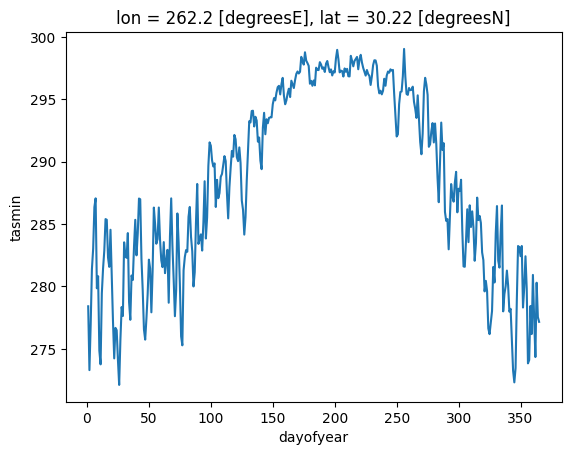

In [8]:
import matplotlib.pyplot as plt
plt.figure()
min_days.isel(lat=19,lon=19).plot()
plt.show()

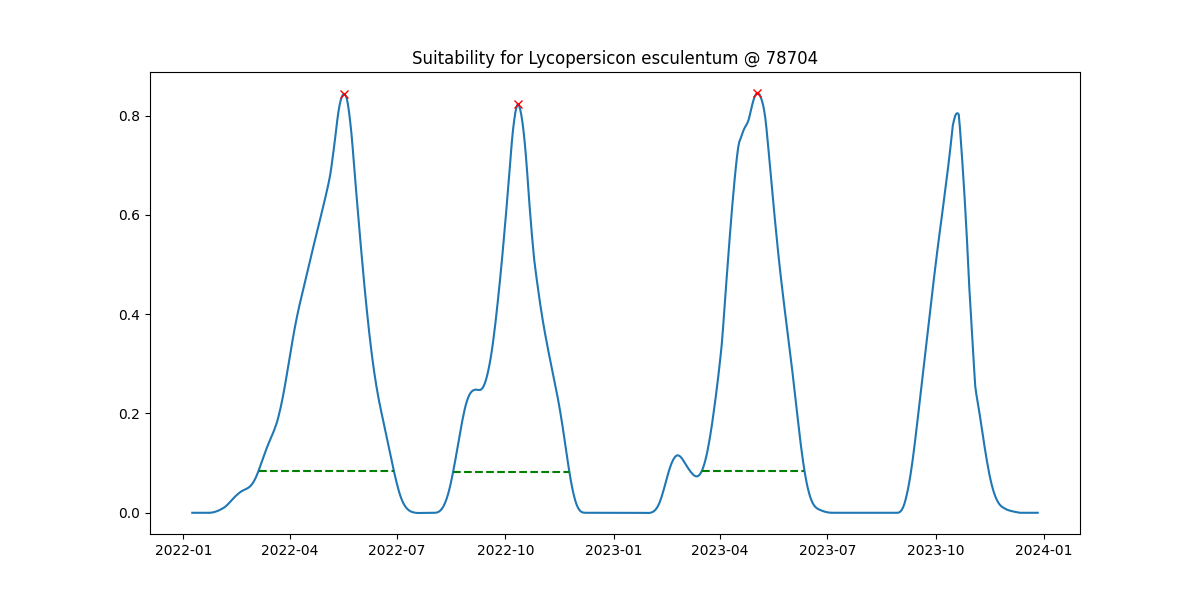

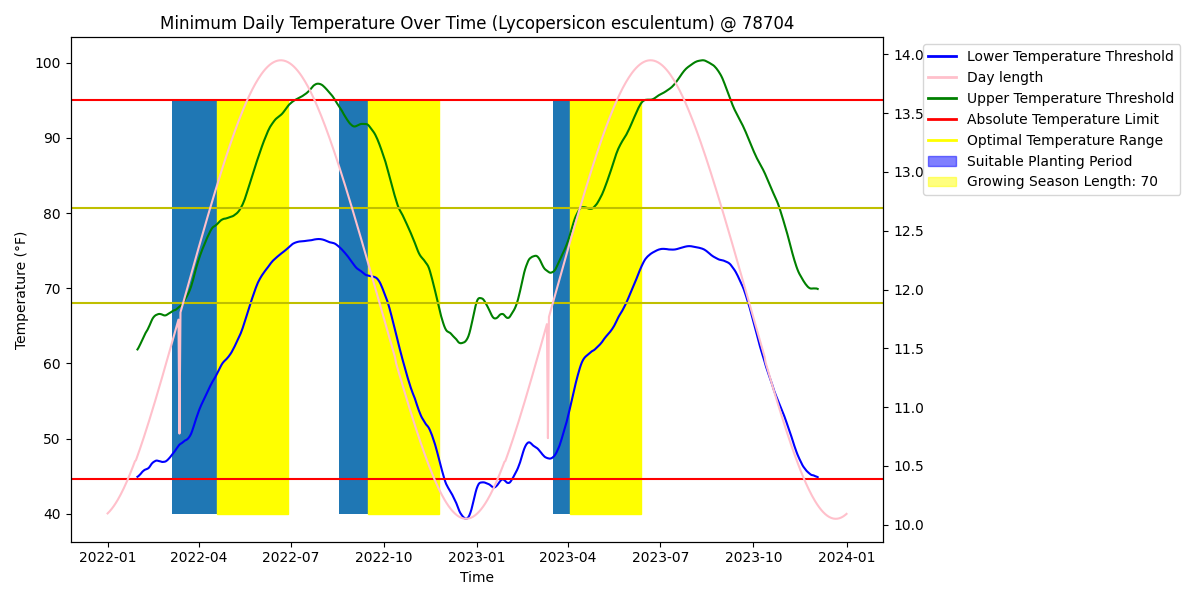

{70: [(3, 5, 4, 19), (8, 17, 9, 15)],
 80: [(3, 5, 4, 9)],
 90: [(3, 5, 3, 30)],
 100: [(3, 5, 3, 20)],
 110: [(3, 5, 3, 10)],
 120: [],
 130: [],
 140: [],
 150: []}

In [4]:
import matplotlib
matplotlib.pyplot.close()
%matplotlib widget

# Select your crop of interest (replace 'Maize' with your desired crop)
# crop_name = 'Allium cepa' #onion
crop_name= "Lycopersicon esculentum" # Tomatoes
# crop_name = "Brassica juncea" # Mustard greens
# crop_name = "Vigna unguiculata"
# crop_name = "Asparagus officinalis" # asparagus
# crop_name = "Ipomoea batatas" # sweet potato
# crop_name = "Solanum tuberosum" # Potato
# crop_name = "Cynara scolymus" # artichoke
bolting = False
frost_tolerance = 0

# 93922 monterey county

# short day: 11-12, long=14;16
min_day = 0
max_day = 24
crop_sim.all_in_one("78704", crop_name, bolting, min_day, max_day)

In [98]:
# crop_sim.plot_suitability(view_window, growing_season_suitability, daily_suitability, lat, lon, crop_name, cutoff)

In [631]:
# suit = growing_season_suitability[view_window]
# x = suit.where(suit > 0)
# y = xr.where(suit > 0, suit, 0)
# x == y
# print(suit)

In [646]:
# plt.subplots(figsize=(12, 6))

# # plt.plot(suit.time, .isel(lat=lat,lon=lon), color="green")
# plt.plot(suit.time, suit.isel(lat=lat,lon=lon))
# # from scipy.signal import savgol_filter
# # # Apply Savitzky-Golay filter
# # window_length = 13  # Must be odd
# # polyorder = 3

# # smoothed_data = xr.apply_ufunc(
# #     savgol_filter,
# #     suit,
# #     kwargs={"window_length": window_length, "polyorder": polyorder},
# #     input_core_dims=[["time"]],
# #     output_core_dims=[["time"]],  # Output is a single value per input
# #     output_dtypes=[suit.dtype]
# # )
# # plt.plot(smoothed_data.isel(lat=lat,lon=lon))
# plt.show()